# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 2. Load the titanic dataset from seaborn

In [14]:
titanic = sns.load_dataset('titanic')



## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [15]:
titanic.shape

(891, 15)

Question 2: Are there any missing values?

In [16]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [17]:
#dropping deck column, too many missing values
titanic = titanic.drop('deck', axis=1)

In [18]:
#printing columns without deck
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [19]:
# imputing age with median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

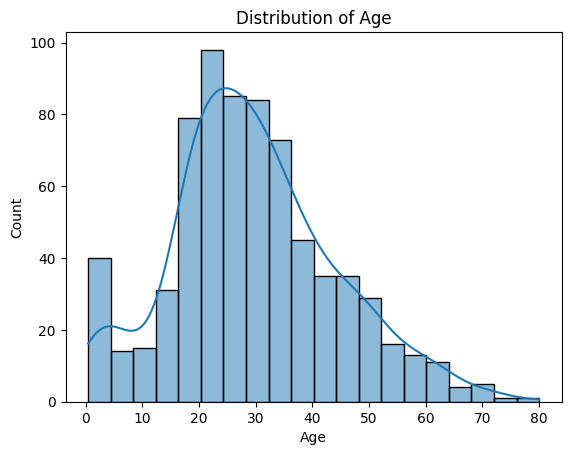

In [7]:
# Distribution of Age
sns.histplot(titanic['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

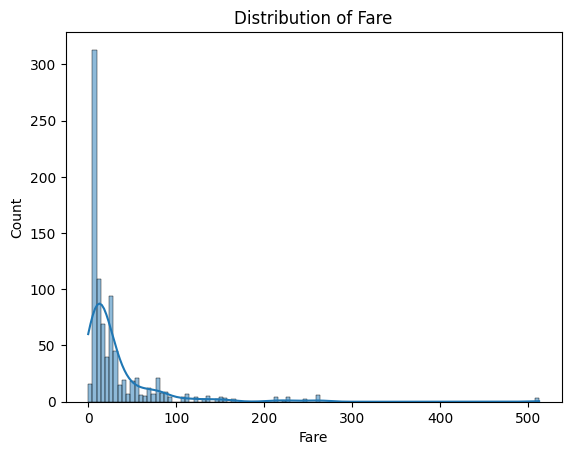

In [8]:
# Distribution of Fare
sns.histplot(titanic['fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

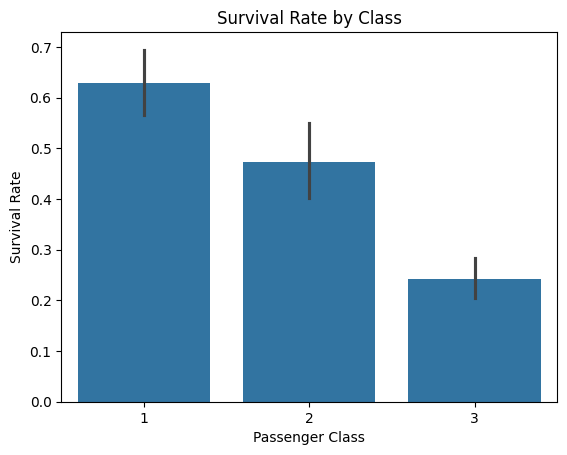

In [9]:
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


### Split the data into training and testing sets

In [20]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [23]:
# Define numerical and categorical features
numerical_features = ['age', 'fare']
categorical_features = ['pclass', 'sex', 'embarked', 'who', 'alone']

In [25]:
# Create pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [26]:
# Create pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])


In [27]:
# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

## Training data with multiple models

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [30]:
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.8156424581005587

Model: Logistic Regression
Accuracy: 0.7932960893854749

Model: Decision Tree
Accuracy: 0.7597765363128491

Model: Random Forest
Accuracy: 0.8268156424581006

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.8156424581005587

Model: Gradient Boosting
Accuracy: 0.8100558659217877


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
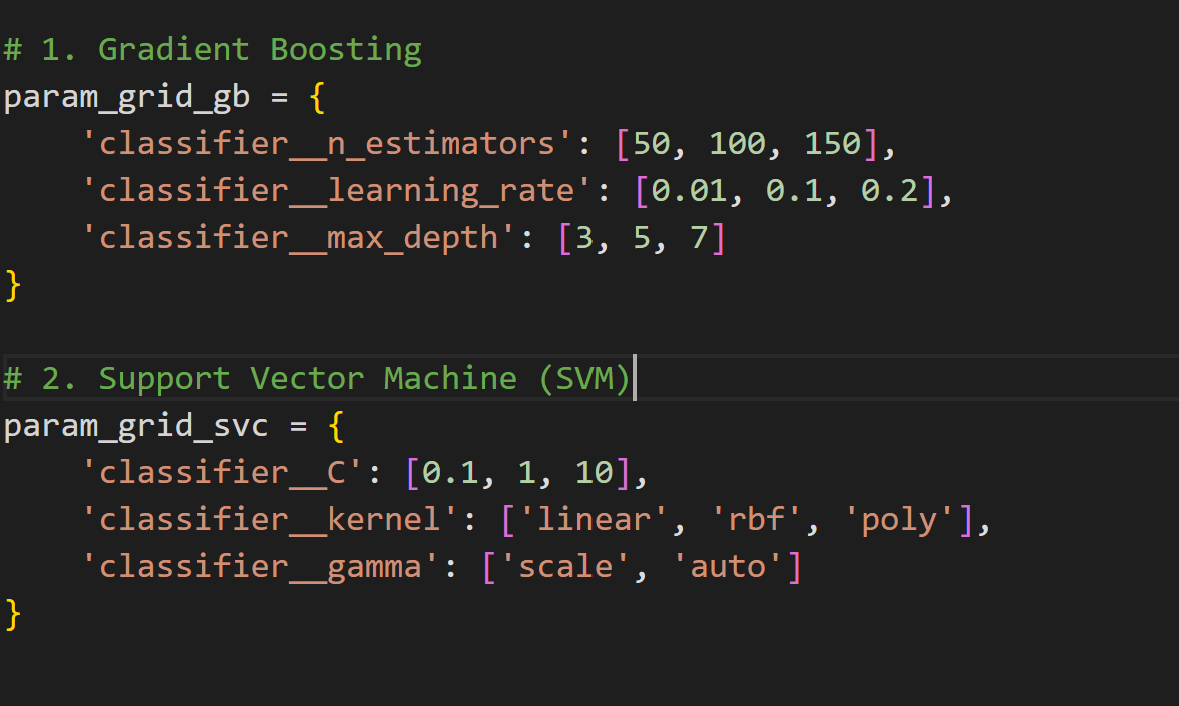

In [32]:
from sklearn.model_selection import GridSearchCV
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    }
}

## List of models and their corresponding parameter grids
Example
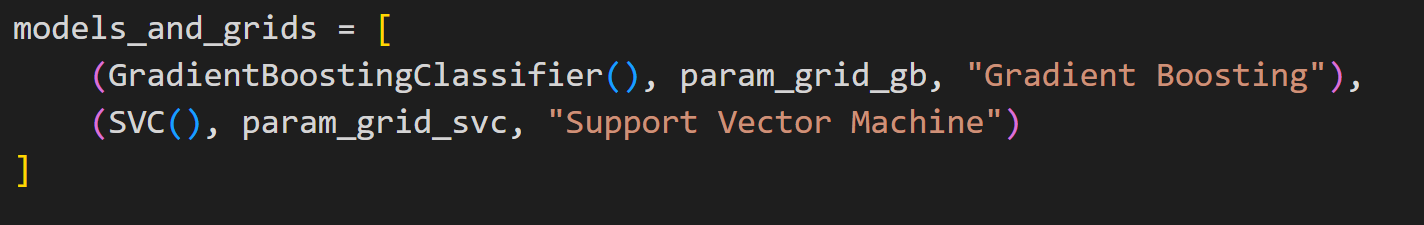

In [33]:
models_and_grids = {
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'classifier__n_neighbors': [3, 5, 7, 9],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [None, 5, 10],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [None, 5, 10],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'param_grid': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf', 'poly'],
            'classifier__gamma': ['scale', 'auto']
        }
    },
    'Bagging Classifier': {
        'model': BaggingClassifier(),
        'param_grid': {
            'classifier__n_estimators': [10, 20, 30],
            'classifier__max_samples': [0.5, 0.7, 1.0],
            'classifier__max_features': [0.5, 0.7, 1.0]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7]
        }
    }
}

In [37]:
for model_name, model_data in models_and_grids.items():
    # Access model and param_grid from model_data dictionary
    model = model_data['model']
    param_grid = model_data['param_grid']

    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for K-Nearest Neighbors: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.8062


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth


Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best cross-validation accuracy for Logistic Regression: 0.7977

Best parameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Best cross-validation accuracy for Decision Tree: 0.8131

Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.8244

Best parameters for Support Vector Machine: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best cross-validation accuracy for Support Vector Machine: 0.8259

Best parameters for Bagging Classifier: {'classifier__max_features': 0.5, 'classifier__max_samples': 0.7, 'classifier__n_estimators': 30}
Best cross-validation accuracy for Bagging Classifier: 0.8371

Best parameters for Gradient Boosting: {'classifier__learning_r

## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?

5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.

1. without tuning random forest worked the best
2. after tuning gradient boosting and the bagging classifier did the best. Bagging Classifier (accuracy: 0.8371)
Support Vector Machine (SVM) (accuracy: 0.8259)
3. before tuning gradient boosting accuracy was 81%,
bagging classifier was 81.5%. The model that showed the most improvement was deision trees. the accuracy score before tuning was 76%,
after tuning it was 81.3%
4. Logistic Regression: C=0.1, penalty='l2'
Decision Tree: max_depth=5, min_samples_leaf=1, min_samples_split=10
Random Forest: max_depth=10, min_samples_split=10, n_estimators=200
SVM: C=1, gamma='scale', kernel='rbf'
Bagging Classifier: max_features=0.5, max_samples=0.7, n_estimators=30
Gradient Boosting: learning_rate=0.01, max_depth=3, n_estimators=300
Tuning C in Logistic Regression and C/gamma in SVM helped balance bias-variance.Parameters such as max_depth, min_samples_split, and n_estimators for tree-based models were optimized, likely to reduce overfitting while maintaining accuracy.
5. based on the results i would recommend the bagging classifier because it achieved the highest cross-validation accuracy (0.8371), indicating strong generalization performance on unseen data, which is crucial for deployment.
6. based on the accuracy scores, gradient boosting appears to be the best performing model which indicates it generalizes well to unseen data, and boosting algorthims can handle missing values effectively.